In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
import numpy as np
print(tf.__version__)

C:\Users\Coco\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


1.10.0


In [8]:
# https://keras.io/zh/datasets/
boston_housing = keras.datasets.boston_housing
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()
# shuffle the training set
# np.argsort():
print(train_labels.shape)
# 按照升序排序后的下标order数组
order = np.argsort(np.random.random(train_labels.shape))
# 按照升序排序后的训练集
train_data = train_data[order]

(404,)


In [9]:
print("Training set: {}".format(train_data.shape))  # 404 examples, 13 features
print("Testing set:  {}".format(test_data.shape))   # 102 examples, 13 features

Training set: (404, 13)
Testing set:  (102, 13)


In [10]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


In [11]:
print(train_labels[0:10]) 

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4]


In [12]:
# normalize features
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data = (train_data - mean) / std
test_data = (test_data - mean) / std

print(train_data[0])  # First training sample, normalized

[-0.39725269  1.41205707 -1.12664623 -0.25683275 -1.027385    0.72635358
 -1.00016413  0.02383449 -0.51114231 -0.04753316 -1.49067405  0.41584124
 -0.83648691]


In [16]:
# create model
def build_model():
    model = keras.Sequential([keras.layers.Dense(64, activation=tf.nn.relu, 
                                                 input_shape=(train_data.shape[1],)),
                              keras.layers.Dense(64, activation=tf.nn.relu),
                              keras.layers.Dense(1)])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    # 评价指标，损失函数会用于训练过程，而评价函数不会用于训练
    # 损失函数：mse：均方误差， rmse(root mean squard error), 均方根误差
    # 评价函数：mae: 平均绝对误差
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [17]:
model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [27]:
# train model
# print():end param:在每一个打印语句结束的时候打印内容
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
            print('.', end='')

In [34]:
EPOCHS = 500
# fit():return:tensorflow.python.keras.callbacks.History
# 
# 一个 History 对象。其 History.history 属性是连续 epoch 训练损失和评估值，以及验证集损失和评估值的记录（如果适用）。
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[PrintDot()])


.


.


.


.


.

In [32]:
import matplotlib.pyplot as plt
# plot(x, y, label='line name')
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
             label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
             label='Val Loss')
    plt.legend()
    plt.ylim([0, 5])

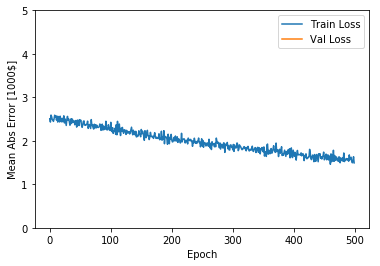

In [33]:
plot_history(history)

In [35]:
[loss, mae] = model.evaluate(test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $11401.98


In [ ]:
test_predictions = model.predict(test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [1000$]')
plt.ylabel('Predictions [1000$]')
# 设置坐标轴函数，可以help(plt.axis)参看详情
# 'equal'使x, y两个坐标的范围一样
plt.axis('equal')
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
# plot():[xmin, xmax], [ymin, ymax]
_ = plt.plot([-100, 100], [-100, 100])
error = test_predictions - test_labels
plt.hist(error, bins=50)
plt.xlabel("Prediction Error [1000$]")
_ = plt.ylabel("Count")